# CSC421 Fall 2024 Assignment 4
### Instructor: Brandon Haworth
#### Notebook Credit: George Tzanetakis
Jupyter Notebooks you encounter during the course were largely developed by Prof. Tzanetakis from a previous iteration of this course. I've since changed/developed them where necessary for my own iterations of CSC 421.

This notebook is based on the topics covered in **CHAPTER 14 - Probabilistic Reasoning over Time**, **Chapter 19 Learning**, and **Chapter 21 Deep Learning** from the book *Artificial Intelligence: A Modern Approach.*

1. [6 Marks]: Generate HMM samples (Basic)   
2. [8 Marks]: Learning the HMM model from data (Expected)
3. [14 Marks]: Maximum Likelihood, MAP, and Bayesian Learning (Advanced)
4. [8 Marks]: Expectation Maximization (Expected)
5. [10 Marks]: Learning MLP Classifiers (Advanced)

 # Question 1 (Basic) - Generate HMM samples - 6 Marks


Explore hidden Markov models (HMMs) using the hmmlearn Python library:
[https://hmmlearn.readthedocs.io/en/latest/index.html].

You can use the code for the weather example in the probabilistic reasoning over time notebook we covered in class as a template/starting point for writing your code.

The problem here is inspired by the use of HMMs in bioinformatics. There are several simplifications made to make it reasonable as part of an assignment. DNA sequences can be considered strings over an alphabet of 4 symbols/nucleobases **A,C,T,G (adenine, cytosine, thymine, guanine**. Parts of a DNA sequence are dense with C and G and other parts are sparse with C and G and it is of interest to biologists to identify these regions.

We will model the **CG-dense**(CGD) and **CG-sparse** (CGS) as hidden states, and the nucleobases will be the observations. Through experimental data, we have the following information:

1. The transition probability from CGD to CGS is 0.37 and the probability of staying in CGD is 0.63. The transition probability from CGS to CGD is similarly 0.37 with 0.63 being the probability of staying in CGS.

2. The observation probabilities of CGD regions are A: 0.15, C:0.35, G: 0.35, and T:0.15. The observation probabilities of CGS regions are A: 0.40, C: 0.10, G: 0.10, T: 0.40

3. You can assume that the initial state probabilities are the same (0.5)

4. For visualization of the DNA sequences use the following color mapping: A: red, C: green, T: blue, G: yellow, and for CGD: black
and CGS: white


Your tasks:
1. Define this HMM model using the **hmmlearn** conventions.
2. Then use the created model to generate a sequence of 1000 samples (i.e. both hidden states and corresponding observations).
3. Use the colours above to visualize the sequence of samples.



In [2]:
!pip install hmmlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 4.2 MB/s eta 0:00:00


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


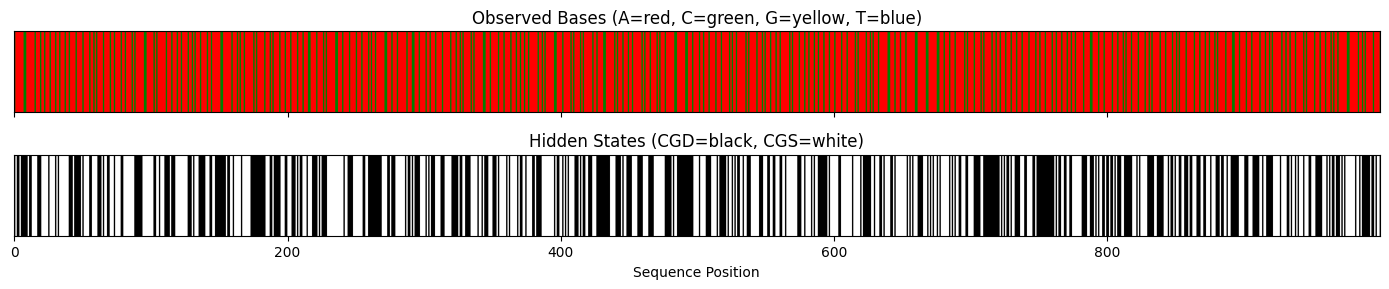

In [7]:
# Install hmmlearn if missing
!pip install hmmlearn --quiet

# ---- HMM + Simulation + Visualization (all in one cell) ----

import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Encode nucleotides as integers
# A=0, C=1, G=2, T=3

# Setup HMM
model = hmm.MultinomialHMM(
    n_components=2,      # States: CGD, CGS
    init_params="",      # Prevent auto-reset of params
    random_state=42,
    n_trials=1           # REQUIRED in modern hmmlearn
)

# Initial State Probabilities
model.startprob_ = np.array([0.5, 0.5])  # CGD, CGS

# Transition Probabilities
# CGD -> CGD = 0.63, CGD -> CGS = 0.37
# CGS -> CGD = 0.37, CGS -> CGS = 0.63
model.transmat_ = np.array([
    [0.63, 0.37],
    [0.37, 0.63]
])

# Emission Probabilities
# Order: A,C,G,T  (0,1,2,3)
model.emissionprob_ = np.array([
    [0.15, 0.35, 0.35, 0.15],  # CGD
    [0.40, 0.10, 0.10, 0.40]   # CGS
])

# Generate 1000 samples (observations + hidden states)
n_samples = 1000
obs, states = model.sample(n_samples)
obs = obs.ravel()  # flatten

# Color maps
# Observed nucleotides: A:red, C:green, G:yellow, T:blue
obs_cmap = ListedColormap(["red", "green", "yellow", "blue"])

# Hidden states: CGD:black, CGS:white
state_cmap = ListedColMap = ListedColormap(["black", "white"])

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 3), sharex=True)

axes[0].imshow(obs[np.newaxis, :], aspect="auto",
               cmap=obs_cmap, vmin=0, vmax=3)
axes[0].set_yticks([])
axes[0].set_title("Observed Bases (A=red, C=green, G=yellow, T=blue)")

axes[1].imshow(states[np.newaxis, :], aspect="auto",
               cmap=state_cmap, vmin=0, vmax=1)
axes[1].set_yticks([])
axes[1].set_xlabel("Sequence Position")
axes[1].set_title("Hidden States (CGD=black, CGS=white)")

plt.tight_layout()
plt.show()


# Question 2 (Expected) - Learning the HMM model from data  - 8 Marks

1. Generate 10000 samples using the HMM defined in Q1 for generating DNA sequences.
2. Now learn a new HMM in an unsupervised fashion from the data you just generated, similarly to what we did with the weather example i.e. only use the observation samples not the "hidden" states for estimating the model using the fit function.
3. Contrast the original HMM from Q1 to the HMM estimated/learned from the data by comparing the transition and observation matrices. Print both matrices.
4. Generate a sequence of 1000 samples (i.e., both hidden and corresponding observations). Plot the generated sequence of 1000 samples from Q1 again, this time next to the 1000 samples you just generated, using the colours defined in Q1. Clearly label each figure (see the notebook from the lecture), so you can see the generations of states and observations from both the defined HMM in Q1 next to the learned HMM here.


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


=== ORIGINAL TRANSITION MATRIX ===
[[0.63 0.37]
 [0.37 0.63]]

=== LEARNED TRANSITION MATRIX ===
[[0.52489526 0.47510474]
 [0.76293369 0.23706631]]

=== ORIGINAL EMISSION MATRIX ===
[[0.15 0.35 0.35 0.15]
 [0.4  0.1  0.1  0.4 ]]

=== LEARNED EMISSION MATRIX ===
[[0.77781797 0.22218203 0.         0.        ]
 [0.70533113 0.29466887 0.         0.        ]]


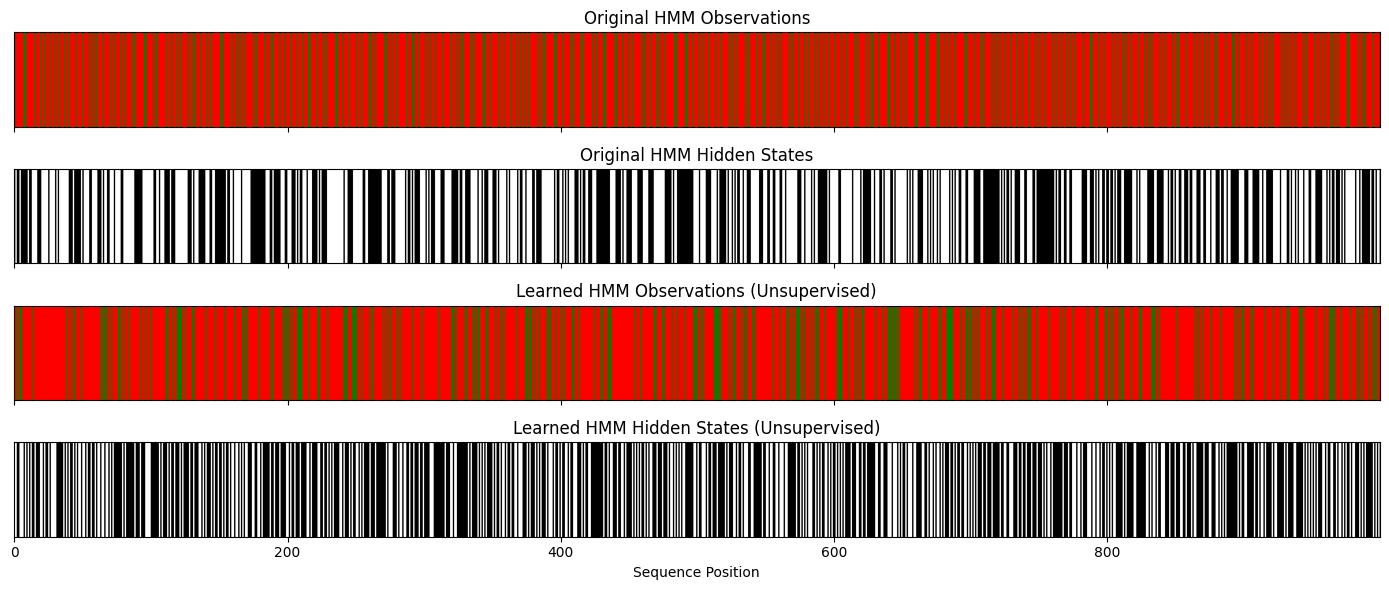

In [9]:
# Install hmmlearn if needed
!pip install hmmlearn --quiet

# ---- FULL SOLUTION FOR Q2 (latest hmmlearn compatible) ----

import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ============================================================
# Helper: convert integer symbols to one-hot rows
# ============================================================
def to_onehot(obs, n_symbols=4):
    onehot = np.zeros((len(obs), n_symbols), dtype=int)
    onehot[np.arange(len(obs)), obs] = 1
    return onehot

# ============================================================
# Build ORIGINAL HMM (same as Q1)
# ============================================================

orig_model = hmm.MultinomialHMM(
    n_components=2,
    init_params="",
    random_state=42,
    n_trials=1
)

orig_model.startprob_ = np.array([0.5, 0.5])

orig_model.transmat_ = np.array([
    [0.63, 0.37],
    [0.37, 0.63]
])

orig_model.emissionprob_ = np.array([
    [0.15, 0.35, 0.35, 0.15],
    [0.40, 0.10, 0.10, 0.40]
])

# ============================================================
# Generate 10,000 samples
# ============================================================

N = 10000
obs_full, hidden_full = orig_model.sample(N)
obs_full = obs_full.ravel()
obs_full_onehot = to_onehot(obs_full)  # for fitting

# ============================================================
# Learn NEW model from observations only
# ============================================================

learned_model = hmm.MultinomialHMM(
    n_components=2,
    n_trials=1,
    random_state=0
)

learned_model.fit(obs_full_onehot)

# ============================================================
# Print matrices for comparison
# ============================================================

print("=== ORIGINAL TRANSITION MATRIX ===")
print(orig_model.transmat_)
print("\n=== LEARNED TRANSITION MATRIX ===")
print(learned_model.transmat_)

print("\n=== ORIGINAL EMISSION MATRIX ===")
print(orig_model.emissionprob_)
print("\n=== LEARNED EMISSION MATRIX ===")
print(learned_model.emissionprob_)

# ============================================================
# Generate 1000 samples from both models
# ============================================================

obs_orig_1k, states_orig_1k = orig_model.sample(1000)
obs_orig_1k = obs_orig_1k.ravel()

obs_learned_raw, states_learned_1k = learned_model.sample(1000)

# convert the one-hot emissions back to single categories
obs_learned_1k = obs_learned_raw.argmax(axis=1)

# ============================================================
# Visualization
# ============================================================

# Colors:
# A=red, C=green, G=yellow, T=blue
obs_cmap = ListedColormap(["red", "green", "yellow", "blue"])

# Hidden states:
# CGD=black, CGS=white
state_cmap = ListedColormap(["black", "white"])

fig, axes = plt.subplots(4, 1, figsize=(14, 6), sharex=True)

axes[0].imshow(obs_orig_1k[np.newaxis, :], aspect="auto",
               cmap=obs_cmap, vmin=0, vmax=3)
axes[0].set_title("Original HMM Observations")
axes[0].set_yticks([])

axes[1].imshow(states_orig_1k[np.newaxis, :], aspect="auto",
               cmap=state_cmap, vmin=0, vmax=1)
axes[1].set_title("Original HMM Hidden States")
axes[1].set_yticks([])

axes[2].imshow(obs_learned_1k[np.newaxis, :], aspect="auto",
               cmap=obs_cmap, vmin=0, vmax=3)
axes[2].set_title("Learned HMM Observations (Unsupervised)")
axes[2].set_yticks([])

axes[3].imshow(states_learned_1k[np.newaxis, :], aspect="auto",
               cmap=state_cmap, vmin=0, vmax=1)
axes[3].set_title("Learned HMM Hidden States (Unsupervised)")
axes[3].set_yticks([])
axes[3].set_xlabel("Sequence Position")

plt.tight_layout()
plt.show()


# QUESTION 3 (Advanced) - Maximum Likelihood, MAP, and Bayesian Learning - 14 Marks

In this question, you are asked to come up with a variation to an existing example from the book.

The example was covered in the notebook about learning probabilistic models and describes 5 bags of candy of two types (lime and cherry) as 5 hypotheses, you can use the code from that notebook. Come up with a scenario (be creative but realistic) in which each hypothesis is similarly selected with a prior probability. Your example should describe a realistic scenario i.e. not just have numbers but have some kind of interpretation. Details below!

Show, similarly to how the example is described in the book, how you would perform maximum a posteriori estimation, and Bayesian Learning given some successive samples from your model. Include plots in your example. Details below.

Your tasks
1. Clearly describe your scenario in markdown, with a similar level of detail as presented in class/in the textbook (see Learning Probabilistic Models part 2).
    1. Define 5 hypotheses
    2. Define 5 sample data observation sequences (HINT: to make some of your code simpler choose a single length for all of your observations, which should be at minimum 10) (NOTE: This is only interesting if you generate some sequences which may be associated with different hypotheses, you should make observations that reflect more that one of your hypotheses)
    3. Compute and show the likelihood of these hypotheses for each of your data observation sequences
    4. Define priors for each hypothesis and give some reasoning (relate to your made-up scenario)
3. Given some successive samples from your model (i.e., your data observation sequences)
    1. Plot the posterior probabilities of each hypothesis as they are updated over each data observation (you should have 5 plots with 5 lines on them, 5 observations with 5 hypotheses respectively). For each, data observation sequence note which hypothesis is chosen by the end of your updates that most likely explains what model generated your data.
    2. For each data observation sequence try to predict the next observation in the sequence using Bayes Learning (5 plots one for each of the data sequences where the probability of the next observation is given using Bayes)
    3. Repeat the above using MAP. Note like in the lecture notebook, you can plot MAP vs Bayes for each as long as you have a legend showing which curve is which.

*# Your description goes here as **Markdown**.* Use Latex appropriately for all mathematical notation.

In [ ]:
# The code portion of your answer goes here

# QUESTION 4 (Expected) - Expectation Maximization - 8 Marks

In this question, you are asked to extend the toy Expectation Maximization algorithm introduced in the learning probabilistic models notebook to handle 3 classes and more than one parameter (each class has its own two parameters: mu and sigma of the Gaussian normal).

Below we generate data for three normally distributed classes of reaction times for the general population, gamers, and pilots. Your task is to:
1. Complete the E step that samples from the pdf of each class and updates the estimates samples for each class
2. Complete the M step that estimates parameters from the samples
3. Once EM has been run, generate 1000 samples from the EM estimated distribution parameters for each class
4. Plot these generated distributions in the same way shown below for the distributions with MLE parameters

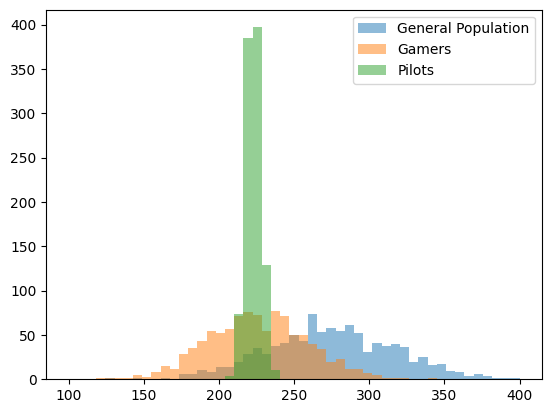

MLE Estimates of Normal Distrubiton parameters from generated data
General population mu:  275.3254729194707  ; sigma:  43.1789964567774
Gamer population mu:  225.99853050786263  ; sigma:  33.236581500379174
Pilot population mu:  223.13956868966415  ; sigma:  4.997032898616282


In [10]:
import numpy as np
from matplotlib import pyplot

# Gaussian Normal distribution parameters for three classes of reaction time general population, gamers, and Navy fighter pilots
mean_reaction_time_general = 278   # Mean reaction time of the general population is ~250ms
std_reaction_time_general  = 45    # STD of reaction time of the general population is ~30ms
mean_reaction_time_gamers  = 227   # Reaction time of the gamer population is ~227ms
std_reaction_time_gamers   = 33    # STD of reaction time of the general population is ~33ms
mean_reaction_time_pilots  = 223   # Reaction time of the US Navy fighter pilot population is ~223ms
std_reaction_time_pilots   = 5    # STD of reaction time of the US Navy fighter pilot population is ~5ms

# generate 1000 samples of each class
general_samples = np.random.normal(mean_reaction_time_general, std_reaction_time_general, 1000)
gamer_samples = np.random.normal(mean_reaction_time_gamers, std_reaction_time_gamers, 1000)
pilot_samples = np.random.normal(mean_reaction_time_pilots, std_reaction_time_pilots, 1000)

# Plot this generated data
bins = np.linspace(100, 400, 50)
pyplot.hist(general_samples, bins, alpha=0.5, label='General Population')
pyplot.hist(gamer_samples, bins, alpha=0.5, label='Gamers')
pyplot.hist(pilot_samples, bins, alpha=0.5, label='Pilots')
pyplot.legend(loc='upper right')
pyplot.show()

# MLE of MEAN (mu) and STD (sigma) of all classes
mle_mean_general = np.mean(general_samples)
mle_std_general = np.std(general_samples)
mle_mean_gamers = np.mean(gamer_samples)
mle_std_gamers = np.std(gamer_samples)
mle_mean_pilots = np.mean(pilot_samples)
mle_std_pilots = np.std(pilot_samples)

print("MLE Estimates of Normal Distrubiton parameters from generated data")
print("General population mu: ", mle_mean_general, " ; sigma: ", mle_std_general)
print("Gamer population mu: ", mle_mean_gamers, " ; sigma: ", mle_std_gamers)
print("Pilot population mu: ", mle_mean_pilots, " ; sigma: ", mle_std_pilots)



0  General pop.:  260 30  Gamers:  250 30  Pilots:  240 20
1  General pop.:  294.0950764953453 29.307159016004142  Gamers:  185.97316255939467 15.596923686902086  Pilots:  227.27151634917706 11.57845876102678
2  General pop.:  289.4859875124743 30.349257298607732  Gamers:  188.2618020560045 16.06988359662769  Pilots:  225.9950290378012 9.265139054183887
3  General pop.:  286.26825187121267 31.174626771539934  Gamers:  189.5730032277181 16.367858056453805  Pilots:  225.12975626269784 7.842961708802621
4  General pop.:  284.1430596485186 31.76673240679142  Gamers:  190.36318620245484 16.547549109306978  Pilots:  224.61154267049173 7.041760067407969
5  General pop.:  282.1359595975439 32.31141740856369  Gamers:  191.0781484554632 16.706545351911203  Pilots:  224.13222460857904 6.315479081695011
6  General pop.:  280.9987455717452 32.61129050487612  Gamers:  191.6666760777695 16.82704845703985  Pilots:  223.8998546693367 5.884520315666899
7  General pop.:  280.2691402037689 32.810288227817

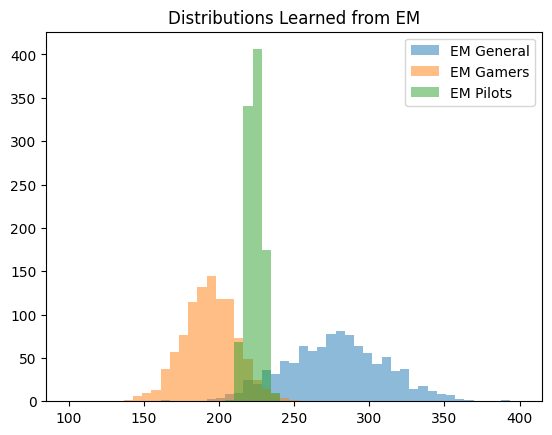

In [12]:

from scipy.stats import norm

# First, some initial guess of the parameter we do not know, mu for each class.
em_mean_general = 260
em_std_general = 30
em_mean_gamers = 250
em_std_gamers = 30
em_mean_pilots = 240
em_std_pilots = 20

reaction_times = np.hstack([general_samples,gamer_samples,pilot_samples]) # Stack arrays in sequence horizontally (column wise).
np.random.shuffle(reaction_times)

for i in range(0,20): # iterate 20 times, remember EM is an iterative method.
    estimated_general_samples = []
    estimated_gamer_samples = []
    estimated_pilot_samples = []
    print(i," General pop.: ", em_mean_general, em_std_general," Gamers: ", em_mean_gamers, em_std_gamers," Pilots: ", em_mean_pilots, em_std_pilots)

    for r in reaction_times:
        # E-step - use current model to estimate values for the hidden variable (class membership)
        # Your code goes here
        # ==========================
        # E-STEP
        # ==========================
        # compute likelihoods
        p_gen   = norm.pdf(r, em_mean_general, em_std_general)
        p_game  = norm.pdf(r, em_mean_gamers,  em_std_gamers)
        p_pilot = norm.pdf(r, em_mean_pilots,  em_std_pilots)

        # pick whichever model best explains the data
        if p_gen > p_game and p_gen > p_pilot:
            estimated_general_samples.append(r)
        elif p_game > p_gen and p_game > p_pilot:
            estimated_gamer_samples.append(r)
        else:
            estimated_pilot_samples.append(r)

    # ==========================
    # M-STEP
    # ==========================
    # Update means:
    em_mean_general = np.mean(estimated_general_samples)
    em_mean_gamers  = np.mean(estimated_gamer_samples)
    em_mean_pilots  = np.mean(estimated_pilot_samples)

    # Update standard deviations:
    em_std_general  = np.std(estimated_general_samples)
    em_std_gamers   = np.std(estimated_gamer_samples)
    em_std_pilots   = np.std(estimated_pilot_samples)
    # M-step - using the estimated class values re-calculate the parameters of the model i.e the means
    # Your code goes here

# generate 1000 samples of each class
em_general_samples = np.random.normal(em_mean_general, em_std_general, 1000)
em_gamer_samples   = np.random.normal(em_mean_gamers,  em_std_gamers,  1000)
em_pilot_samples   = np.random.normal(em_mean_pilots,  em_std_pilots,  1000)

# Plot this generated data
# Your code goes here
bins = np.linspace(100, 400, 50)
pyplot.hist(em_general_samples, bins, alpha=0.5, label='EM General')
pyplot.hist(em_gamer_samples, bins, alpha=0.5, label='EM Gamers')
pyplot.hist(em_pilot_samples, bins, alpha=0.5, label='EM Pilots')
pyplot.legend(loc='upper right')
pyplot.title("Distributions Learned from EM")
pyplot.show()





# QUESTION 5 (Advanced) - Multi-layer Perceptrons - 10 Marks

In this question, you are tasked with exploring the relationship between multi-layer perceptron architecture, optimizer, activation functions, and Error Rate.

The SciKitLearn toolset also has several datasets for practicing and developing your machine-learning approaches to very different types of data. We are going to consider the wine dataset, details here <https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset>

You need to look at the shape of the data variable, it is easy to access training data in the form of data and targets. Use the sci-kit learn MLPClassifer to explore the following tasks (you will learn multiple classifiers)

1. Develop a simple accuracy function that takes in the entire dataset and its actual classification targets and returns the accuracy: $\frac{TP + TN}{TP + TN + FP + FN}$. Note we are purposefully going to ignore any sort of holdout test/train/validate split approach and we will test on the entire dataset itself to see how well the learned model classifies the dataset (*you would not normally do this*). HINT: It is possible to predict over the entire data set in one line of code, like so: *clf.predict(data.data)* where clf is of type MLPClassifier.
2. Use SciKitLearn's cross_validate to perform 10-Fold cross validation on a learned model. Make sure cv=10, scoring=('accuracy'). Take the mean and standard deviation of the 10 returned values.
3. Using MLP Classifier with the Adam solver, with random state = 1 for reproducibility, and max iterations at 10000. Assuming a two-layer MLP architecture, implement a simple grid search over activation functions (using activations below) on each layer size (width), i.e., hidden_layers_sizes=(L1,L2) where L1 and L2 are integers (using the layer_sizes below) for both layers trying to find a combination of layers sizes and activation function that produces the best accuracy. You should train and measure the accuracy of each model (300 models total) and output the results as

   ( *layer 1 size*, *layer 2 size* ) with *activation function* our accuracy: *accuracy from (1)*; cv mean accuracy: *mean accuracy from (2)*; cv accuracy std: *accuracy std from (2)*

   *see examples below*

4. Track the best performing models for both our accuracy taken over the whole dataset and the mean 10-fold cross validation. Output the two winners model information. Output the result as
Our Winning model: ( *layer 1 size*, *layer 2 size* ) with *activation function* : *accuracy from (1)*
CV Winning model:  ( *layer 1 size*, *layer 2 size* ) with *activation function* : *accuracy from (2)*
5. Go over the results from (2) and *for each* activation function try to find the smallest topology that gives good enough values. Often the goal is not necessarily perfect models, particularly when you are resource-constrained. Your goal is to first decide what good enough is and justify it, say, for example, some accuracy level, then find the best layer size combination that meets that requirement. Your goal is to find the *smallest* architecture with a *high* enough accuracy. You should report all three from your findings in the same way as before. You can output
   
Good enough model for ReLu\
( % , % ), with  relu : %\
Good enough model for tanh\
( %, % ), with  tanh : %\
Good enough model for logistic\
( % , % ), with  logistic : %

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_validate
import numpy as np

data = load_wine()

# -----------------------------
# Part 1: Simple accuracy metric
# -----------------------------
def accuracy(model, X, y):
    preds = model.predict(X)
    correct = np.sum(preds == y)
    return correct / len(y)

layer_sizes = range(1,6)           # 1..5
activations = ['relu', 'tanh', 'logistic']

# Track winners
our_accuracy_winner      = -1
our_layer1_winner        = None
our_layer2_winner        = None
our_activation_winner    = None

cv_accuracy_winner       = -1
cv_layer1_winner         = None
cv_layer2_winner         = None
cv_activation_winner     = None

# Store results for later “good enough” search
results = []

# -------------------------------------------------
# Train 300 models: all L1,L2 for all activations
# -------------------------------------------------
for activation in activations:
    for layer1 in layer_sizes:
        for layer2 in layer_sizes:
            clf = MLPClassifier(
                hidden_layer_sizes=(layer1,layer2),
                activation=activation,
                solver='adam',
                random_state=1,
                max_iter=10000
            )

            # Train
            clf.fit(data.data, data.target)

            # Accuracy on full dataset
            our_acc = accuracy(clf, data.data, data.target)

            # 10-fold CV
            cv_results = cross_validate(
                clf,
                data.data,
                data.target,
                cv=10,
                scoring='accuracy'
            )

            cv_mean = np.mean(cv_results['test_score'])
            cv_std  = np.std(cv_results['test_score'])

            # Print results
            print(f"( {layer1} , {layer2} ), with {activation}  our accuracy : {our_acc} ;"
                  f" cv mean accuracy:  {cv_mean} ; cv accuracy std: {cv_std}")

            # Save results
            results.append((activation, layer1, layer2, our_acc, cv_mean, cv_std))

            # Track winner by full dataset accuracy
            if our_acc > our_accuracy_winner:
                our_accuracy_winner   = our_acc
                our_layer1_winner     = layer1
                our_layer2_winner     = layer2
                our_activation_winner = activation

            # Track winner by CV mean
            if cv_mean > cv_accuracy_winner:
                cv_accuracy_winner   = cv_mean
                cv_layer1_winner     = layer1
                cv_layer2_winner     = layer2
                cv_activation_winner = activation


# ----------------------------------------------------
# Print winners
# ----------------------------------------------------
print("\n===========================")
print("WINNERS")
print("===========================")

print(f"Our Winning model: ( {our_layer1_winner} , {our_layer2_winner} ), "
      f"with {our_activation_winner} : {our_accuracy_winner}")

print(f"CV Winning model: ( {cv_layer1_winner} , {cv_layer2_winner} ), "
      f"with {cv_activation_winner} : {cv_accuracy_winner}")

# ----------------------------------------------------
# “Good Enough” models
# ----------------------------------------------------
# Define threshold
GOOD_ENOUGH = 0.90   # you may change this per instructions

def find_smallest_good_model(activation):
    # filter only this activation
    subset = [(l1,l2,cv) for (act,l1,l2,_,cv,_) in results if act==activation]
    # keep only those meeting threshold
    subset = [x for x in subset if x[2] >= GOOD_ENOUGH]

    if not subset:
        return None  # none “good enough”

    # smallest = min(L1+L2), then lexicographically
    subset.sort(key=lambda x: (x[0]+x[1], x[0], x[1]))
    return subset[0]  # (L1,L2,cv_mean)

print("\n===========================")
print("Good Enough Models (>= 90% CV accuracy)")
print("===========================")

for activation in activations:
    model = find_smallest_good_model(activation)
    if model is None:
        print(f"No model for {activation} meets {GOOD_ENOUGH:.2f} CV accuracy.")
    else:
        L1, L2, cv_acc = model
        print(f"Good enough model for {activation}: "
              f"( {L1} , {L2} ), with {activation} : {cv_acc}")


# Note the following two lines are examples, you may store these values in your own way
print('Winning model: (', our_layer1_winner, ',', our_layer2_winner, '), with ', our_activation_winner, ' :', our_accuracy_winner)
print('Winning model: (', cv_layer1_winner, ',', cv_layer2_winner, '), with ', cv_activation_winner, ' :', cv_accuracy_winner)

# Example output (... is not the actual output just there are many lines here)
# ( 1 , 1 ), with  relu  our accuracy : 0.398876404494382 ; cv mean accuracy:  0.3993464052287582 ; cv accuracy std: 0.024707265583576204
# ( 1 , 2 ), with  relu  our accuracy : 0.398876404494382 ; cv mean accuracy:  0.3758169934640523 ; cv accuracy std: 0.02926616101599753
# ...
# Winning model: ( 5 , 4 ), with  logistic  : 1.0
# Winning model: ( 5 , 4 ), with  tanh  : 0.961111111111111

# Good enough model for ReLu
# ( % , % ), with  relu : %
# Good enough model for tanh
# ( %, % ), with  tanh : %
# Good enough model for logistic
# ( % , % ), with  logistic : %


( 1 , 1 ), with relu  our accuracy : 0.398876404494382 ; cv mean accuracy:  0.3993464052287582 ; cv accuracy std: 0.024707265583576204
( 1 , 2 ), with relu  our accuracy : 0.398876404494382 ; cv mean accuracy:  0.3758169934640523 ; cv accuracy std: 0.02926616101599753
( 1 , 3 ), with relu  our accuracy : 0.33146067415730335 ; cv mean accuracy:  0.33137254901960783 ; cv accuracy std: 0.01372549019607843
( 1 , 4 ), with relu  our accuracy : 0.398876404494382 ; cv mean accuracy:  0.3993464052287582 ; cv accuracy std: 0.024707265583576204
( 1 , 5 ), with relu  our accuracy : 0.398876404494382 ; cv mean accuracy:  0.3993464052287582 ; cv accuracy std: 0.024707265583576204
( 2 , 1 ), with relu  our accuracy : 0.398876404494382 ; cv mean accuracy:  0.3993464052287582 ; cv accuracy std: 0.024707265583576204
( 2 , 2 ), with relu  our accuracy : 0.6460674157303371 ; cv mean accuracy:  0.6415032679738563 ; cv accuracy std: 0.06703808493293249
( 2 , 3 ), with relu  our accuracy : 0.331460674157303